In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets/wageGenderEduAge.csv")

In [3]:
display(df)

,wage,education,age,gender
0,5.10,8,35,female
1,4.95,9,57,female
2,5.71,12,34,female
3,3.35,12,26,female
4,4.00,12,64,female
...,...,...,...,...
529,12.50,15,31,male
530,16.00,12,30,male
531,11.36,18,29,male
532,19.88,12,31,male


For this project, we are going to visualize and fit some real data on pay as a function of gender,
education level, and age. Your mission is to determin if females and males recieve roughly
equal pay, and if this holds for people of ages and education levels.
The data are in the wageGenderEduAge.csv file.
There are 4 variables "wage", "education", "age", and "gender". Your job is to explore the data
visually and to identify and illustrate any obvious and important trends. The data are real and,
suitably presented, should reveal an actual problem in our society.
Note that there is one (and only one) obvious y-axis or "dependent" variable: wage. There is
also one categorical or grouping variable: gender.
The final product should be a brief report – perhaps 3 figures or so – that reaches a data-
driven conclusion about the state of the world.
Make sure describe each figure fully so that a naive reader could understand exactly what is
being plotting, and make sure each figure has informative axis labels, etc., and that is looks
good.

Text(16.669166666666662, 0.5, 'Number of Individuals')

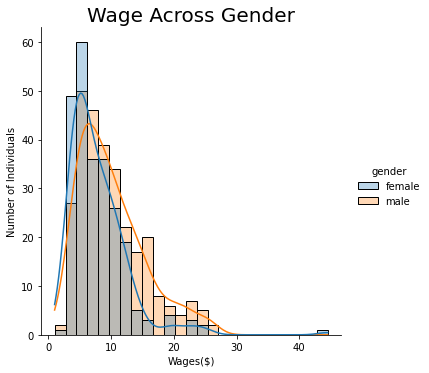

In [14]:
sns.displot(df, x="wage", hue="gender", kind="hist", 
            kde=True, bins = 25, alpha =0.3)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Wages($)")
plt.ylabel("Number of Individuals")


In order to investigate wage differences between men and women, I began by creating a basic histogram with a kde plot overlayed on top of it with the value of wages on the x-axis, and the number of either men and women who received those wages on the y-axis. Looking at the figure, there is clearly something amiss. It appears as though the distribution for men's ages is slightly skewed to the right, with the peak of the kde plot (i.e. the average wage) appearing slightly higher than that of the female distribution. 

Additionally, there are more women stuck at lower wages than men, as the count for male wages surpasses the female count in every wage bin starting at around $9. This suggests that more men are earning higher wages than their female counterparts. Let's look at some additional plots in order to have a more complete picture of the situation. 

Text(0, 0.5, 'Wages($)')

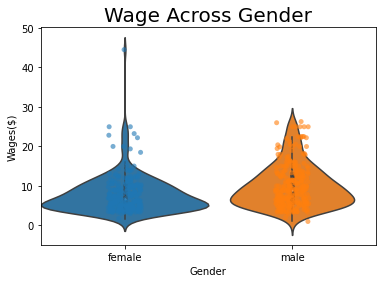

In [6]:
sns.violinplot(data=df, x="gender", y="wage", 
               width = 1)
strip = sns.stripplot(data=df, x="gender", y="wage", 
                      alpha = 0.6)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Wages($)")

This violin plot of Gender on the x-axis and Wages on the y-axis shows a similar phenomenon to what we observed with the previous graph, with a few notable exceptions. While the female distribution clearly extends further than the male distribution, when we really look, we can see that this is do to a single outlier from the female dataset. In reality, these distributions provide additional evidence that more men are earning higher wages than women. This is perfectly demonstrated by the density of the points around the $20 tick on the y-axis. The male distribution shows quite a few more individual points scattered in that region than female points in their distribution. 

Additionally, we see far more women are stuck at wage of less than $10 dollars (As can be seen by the wideness of their plot). The male plot in contrast, is not nearly as wide, indicating that the values are more spread out, namely towards the higher end of the wage spectrum. Let's look at one last plot examining these two dimensions in order to really get an accurate picture of this situation. 

Text(0, 0.5, 'Wage($)')

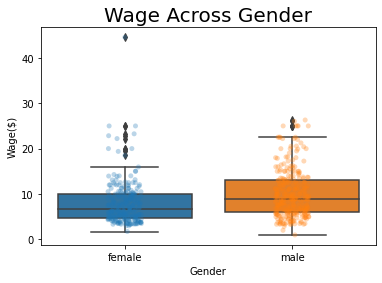

In [7]:
sns.boxplot(data=df, x="gender", y="wage")
strip = sns.stripplot(data=df, x="gender", y="wage", 
                      alpha = 0.3)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Wage($)")

It is in this boxplot we can truly see the disparity between the two genders. Similar to the violin plot above, Gender has been plotted on the x-axis and wages on the y-axis. Here we can see the means (Represented by the solid black line in the middle of each distribution), are different. The males mean appears to be right aroudn 10 dollars, while the female mean is quite a bit lower. Additionally, we can see even more evidence that more men are earning higher wages as the tails on the boxplot (Representing 25 percent of the group we're looking at, and the middle box representing 50 percent) extends all the way to around 25 dollars, while the female distribtuion doesn't even extend to 20 dollars. This essentially tells us that more men are earning higher wages on average than women. 

Let's conduct some exploratory analysis to see if we can spot an alternative explanation for the trend we saw on these three graphs. 

Text(0, 0.5, 'Wage($)')

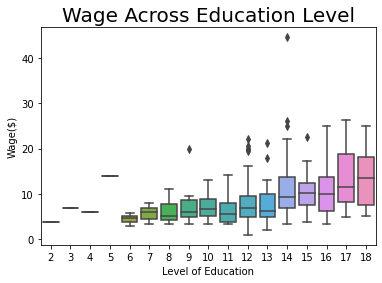

In [43]:
sns.boxplot(data=df, x="education", y="wage")
plt.title("Wage Across Education Level",
         fontsize = 20)
plt.xlabel("Level of Education")
plt.ylabel("Wage($)")

This boxplot displays the relationship between an individuals level of education (x-axis), and their expected wage (y-axis). Ths distribution seems to show a positive relationship between the two variables, with the more education one receives, than the higher their wage on average. So what if the reason we saw that men seem to earn more is simply due to differences in education? Let's check!

Text(0, 0.5, 'Amount of Education')

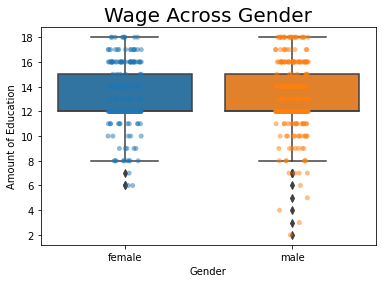

In [29]:
sns.boxplot(data=df, x="gender", y="education")
strip = sns.stripplot(data=df, x="gender", y="education", 
                      alpha = 0.5)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Amount of Education")

Intersting. This graph essentially shows us that each gender shares the same approximate distribution of education levels. Both groups' box and tails essentially start and end at the same points, so it seems like education differences are not the reason for what we saw. Maybe it has to do with age? Let's check it out.

Text(0, 0.5, 'Wage($)')

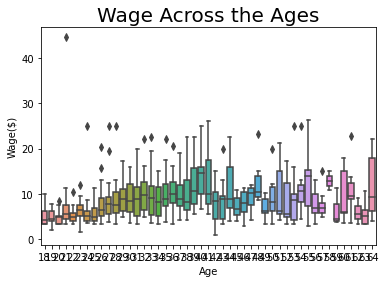

In [39]:
sns.boxplot(data=df, x="age", y="wage")
plt.title("Wage Across the Ages",
         fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Wage($)")

This graph is pretty messy, but let's see if we can glean anything from it. There doesn't seems to be a clear relationship between the two variables execpt for a couple things: There is a general postive relationship between the two starting at around 18 years old and peaking at around 30, after that it begins to oscilate up and down as an individual's age increases. While this graph isn't super useful for making any defintive statements, let's go ahead and look at the age distribution of our two genders to see if we find anything interesting.

Text(0, 0.5, 'Age')

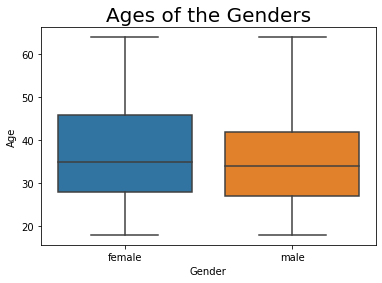

In [31]:
sns.boxplot(data=df, x="gender", y="age")
plt.title("Ages of the Genders",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Age")

Yet again, there isn't much here. Both genders have approximately the same age distribution, with the female group having an average age slightly lower average age than the male distribution. If anything, this is somewhat surprising since the graph showing off the relationship between age and wages seemed to suggest that 30 years old tended to earn more on average, an age group that females seem to have slightly more of, and yet they still earn less.

This collection of graphs suggest that there is a legitimate problem with the wage distribution between men and women in this country. Men seem to be more likely to earn a higher wage on average, despite things such as age and education level remaining fairly constant. The wage distribution for each gender must be investigated futher and proper steps must be taken in order to ensure equality across these individual's pay. 